In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

dataset = pd.read_csv('/content/seattle-weather.csv')
print('Sample Data')
dataset.head()

Sample Data


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
dataset.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
dataset.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [ ]:
# Memilih atribut untuk x dan y
x = dataset.iloc[:, :4]
y = dataset['weather']

x_fixed = x.applymap(convert_to_float)

imputer = SimpleImputer(strategy='mean')
x_fixed = imputer.fit_transform(x_fixed)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

xTrain, xTest, yTrain, yTest = train_test_split(x_fixed, y, test_size=0.3, .random_state=0)

imputer = SimpleImputer(strategy='mean')

xTrain_imputed = imputer.fit_transform(xTrain)
xTest_imputed = imputer.transform(xTest)

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)


RandomForestClassifier()

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(yTest, rf.predict(xTest))))



Random Forest Accuracy: 0.806


In [ ]:
kMeans = KMeans(n_clusters=4)
labels = kMeans.fit_predict(x_fixed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_score = davies_bouldin_score(x_fixed, labels)
print(db_score)

0.815279893356418


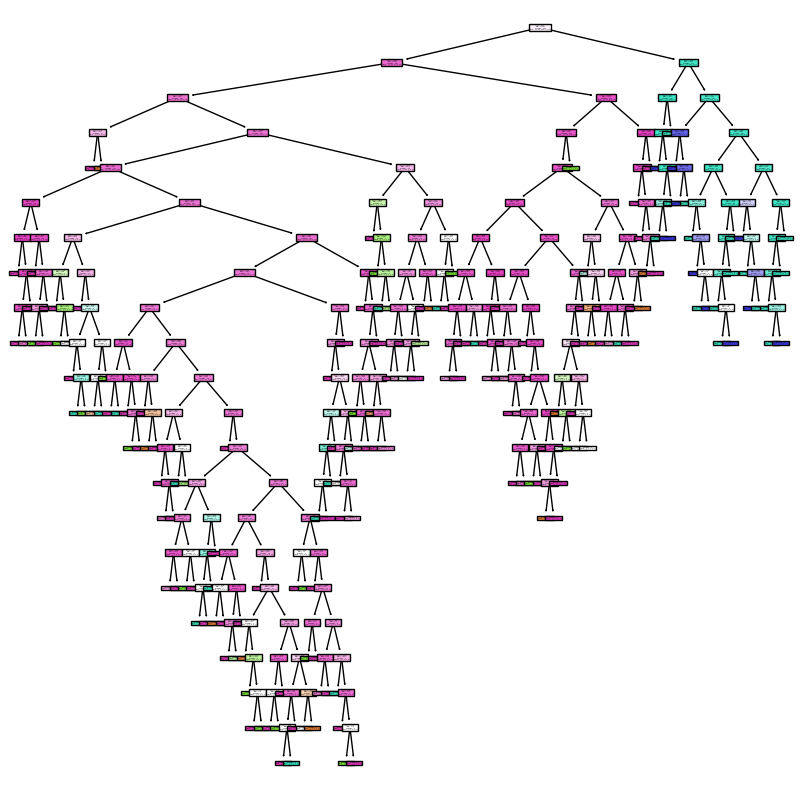

In [ ]:
plt.figure(figsize=(10, 10))
tree.plot_tree(rf.estimators_[0], filled=True)
plt.show()

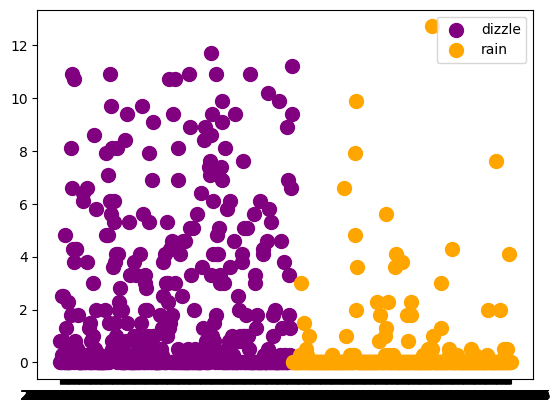

In [ ]:

cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
            x.loc[labels == 0, cols[1]],
            s=100, c='purple',
            label='dizzle')

plt.scatter(x.loc[labels == 1, cols[0]],
            x.loc[labels == 1, cols[1]],
            s=100, c='orange',
            label='rain')

plt.legend()
plt.show()